# Regression Wavelet Forest:

In regression wavelet forest, training data is passed through a tree where every node has a small neural network that returns a probability that the sample 'belongs' to this node. The probability at each level is a multlipication of the node on that level and the nodes leading to this level: <br><br>
$\mu_l(x_i) = \Pi_m\mu_m(x_i)$
<br><br>
The valule in each node is determined by a 'vote' of the samples:
<br><br>
$\hat{y}=\sum_i\mu_l(x_i)y_i$

The prediction value is then determined by a 'vote' of the nodes: <br><br>
$\tilde{y_i} = \sum_l\mu_l(x_i)\hat{y}_l$

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer
import matplotlib.pyplot as plt
import numpy as np
import scipy

x = np.arange(0,30 , 0.1)
y = scipy.special.spherical_jn(0,x)*(x**2)

conf = parameters()

# x,y = step_gen(range = (0,30),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

run.wavelets.prune(even_cutoff=False)
run.recorder.plot_lr()

print("hi")

train: [146.4509872512438, tensor(146.4510, device='cuda:0')]
valid: [161.18557646780303, tensor(161.1856, device='cuda:0')]
train: [146.45029734141792, tensor(146.4503, device='cuda:0')]
valid: [161.2129399463384, tensor(161.2129, device='cuda:0')]
train: [146.44774175995025, tensor(146.4477, device='cuda:0')]
valid: [161.1548492739899, tensor(161.1548, device='cuda:0')]
train: [146.44071634017413, tensor(146.4407, device='cuda:0')]
valid: [160.98597301136363, tensor(160.9860, device='cuda:0')]
train: [146.4306980721393, tensor(146.4307, device='cuda:0')]
valid: [160.61406052714648, tensor(160.6140, device='cuda:0')]
train: [146.44269861629354, tensor(146.4427, device='cuda:0')]
valid: [161.00735874368686, tensor(161.0074, device='cuda:0')]
train: [146.40625, tensor(146.4062, device='cuda:0')]
valid: [159.95867858270202, tensor(159.9587, device='cuda:0')]
train: [146.2715038090796, tensor(146.2715, device='cuda:0')]
valid: [158.41203046085857, tensor(158.4120, device='cuda:0')]
train:

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

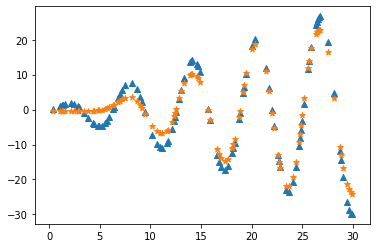

In [32]:
import matplotlib.pyplot as plt
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

In [ ]:
for i in range(1,7):
    conf.tree_depth = 50*i
    learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)
    run.fit(conf.epochs, learn)
    zz = run.recorder.tot_pred.cpu().numpy()
    plt.scatter(xx, zz, marker='*')

plt.show()

train: [146.4510066853234, tensor(146.4510, device='cuda:0')]
valid: [161.19001538825756, tensor(161.1900, device='cuda:0')]
train: [146.4444768345771, tensor(146.4445, device='cuda:0')]
valid: [161.20557133838383, tensor(161.2056, device='cuda:0')]
train: [146.4503653606965, tensor(146.4503, device='cuda:0')]
valid: [161.19603259154042, tensor(161.1960, device='cuda:0')]
train: [141.92061178482587, tensor(141.9206, device='cuda:0')]
valid: [161.74725773358585, tensor(161.7473, device='cuda:0')]
train: [146.45061800373134, tensor(146.4506, device='cuda:0')]
valid: [161.19216579861111, tensor(161.1922, device='cuda:0')]
train: [146.4454388215174, tensor(146.4454, device='cuda:0')]
valid: [161.2071200284091, tensor(161.2071, device='cuda:0')]
train: [146.44978233830847, tensor(146.4498, device='cuda:0')]
valid: [161.1978574810606, tensor(161.1979, device='cuda:0')]
train: [146.44421447450247, tensor(146.4442, device='cuda:0')]
valid: [161.1610440340909, tensor(161.1610, device='cuda:0')]

train: [122.77056125621891, tensor(122.7706, device='cuda:0')]
valid: [178.97518150252526, tensor(178.9752, device='cuda:0')]
train: [120.98317008706468, tensor(120.9831, device='cuda:0')]
valid: [191.1339567550505, tensor(191.1340, device='cuda:0')]
train: [119.54035486629353, tensor(119.5403, device='cuda:0')]
valid: [196.10274621212122, tensor(196.1028, device='cuda:0')]
train: [118.04631141169155, tensor(118.0463, device='cuda:0')]
valid: [181.68523121843435, tensor(181.6852, device='cuda:0')]
train: [116.82980604788557, tensor(116.8298, device='cuda:0')]
valid: [156.3588226010101, tensor(156.3588, device='cuda:0')]
train: [115.51244752798507, tensor(115.5124, device='cuda:0')]
valid: [151.6964567550505, tensor(151.6964, device='cuda:0')]
train: [114.08350824004975, tensor(114.0835, device='cuda:0')]
valid: [150.10588304924244, tensor(150.1059, device='cuda:0')]
train: [112.68761660447761, tensor(112.6876, device='cuda:0')]
valid: [130.51254734848484, tensor(130.5125, device='cuda:

train: [95.1807272232587, tensor(95.1807, device='cuda:0')]
valid: [120.81458136047979, tensor(120.8146, device='cuda:0')]
train: [95.14156755286069, tensor(95.1416, device='cuda:0')]
valid: [120.71826665088383, tensor(120.7183, device='cuda:0')]
train: [95.10391402363184, tensor(95.1039, device='cuda:0')]
valid: [120.64955216224747, tensor(120.6496, device='cuda:0')]
train: [95.06691153606965, tensor(95.0669, device='cuda:0')]
valid: [120.5610104955808, tensor(120.5610, device='cuda:0')]
train: [95.03092933768657, tensor(95.0309, device='cuda:0')]
valid: [120.48441445707071, tensor(120.4844, device='cuda:0')]
train: [94.99478194962687, tensor(94.9948, device='cuda:0')]
valid: [120.4698153409091, tensor(120.4698, device='cuda:0')]
train: [94.96023787313433, tensor(94.9602, device='cuda:0')]
valid: [120.47678937815657, tensor(120.4768, device='cuda:0')]
train: [94.92604361007463, tensor(94.9260, device='cuda:0')]
valid: [120.50630326704545, tensor(120.5063, device='cuda:0')]
train: [94.

train: [138.94181436567163, tensor(138.9418, device='cuda:0')]
valid: [158.0408775252525, tensor(158.0409, device='cuda:0')]
train: [137.1904151119403, tensor(137.1904, device='cuda:0')]
valid: [161.60962160669192, tensor(161.6096, device='cuda:0')]
train: [136.09535331156715, tensor(136.0953, device='cuda:0')]
valid: [154.77668284406565, tensor(154.7767, device='cuda:0')]
train: [134.841602534204, tensor(134.8416, device='cuda:0')]
valid: [168.01836726641415, tensor(168.0184, device='cuda:0')]
train: [129.41283815298507, tensor(129.4128, device='cuda:0')]
valid: [161.15426728219697, tensor(161.1543, device='cuda:0')]
train: [132.27908310012438, tensor(132.2791, device='cuda:0')]
valid: [143.17199337121212, tensor(143.1720, device='cuda:0')]
train: [129.77102767412936, tensor(129.7710, device='cuda:0')]
valid: [164.1742522885101, tensor(164.1743, device='cuda:0')]
train: [128.14934118470148, tensor(128.1494, device='cuda:0')]
valid: [166.12823547979798, tensor(166.1283, device='cuda:0'

train: [32.26862756529851, tensor(32.2686, device='cuda:0')]
valid: [370.15668402777777, tensor(370.1566, device='cuda:0')]
train: [31.998965135261194, tensor(31.9990, device='cuda:0')]
valid: [370.1986663510101, tensor(370.1987, device='cuda:0')]
train: [31.724752701337064, tensor(31.7248, device='cuda:0')]
valid: [397.0640782828283, tensor(397.0641, device='cuda:0')]
train: [31.469573519123134, tensor(31.4696, device='cuda:0')]
valid: [336.9431423611111, tensor(336.9431, device='cuda:0')]
train: [31.24355274409204, tensor(31.2435, device='cuda:0')]
valid: [215.06151357323233, tensor(215.0615, device='cuda:0')]
train: [31.02354438743781, tensor(31.0235, device='cuda:0')]
valid: [130.09308909406565, tensor(130.0931, device='cuda:0')]
train: [30.77883045708955, tensor(30.7788, device='cuda:0')]
valid: [129.16572956123738, tensor(129.1657, device='cuda:0')]
train: [30.50311188199627, tensor(30.5031, device='cuda:0')]
valid: [89.45914220328282, tensor(89.4591, device='cuda:0')]
train: [37

train: [21.331528393190297, tensor(21.3315, device='cuda:0')]
valid: [26.066855074179294, tensor(26.0669, device='cuda:0')]
train: [21.25427792677239, tensor(21.2543, device='cuda:0')]
valid: [25.04342743844697, tensor(25.0434, device='cuda:0')]
train: [21.177615341262438, tensor(21.1776, device='cuda:0')]
valid: [25.04796993371212, tensor(25.0480, device='cuda:0')]
train: [21.102507482120647, tensor(21.1025, device='cuda:0')]
valid: [24.49831814236111, tensor(24.4983, device='cuda:0')]
train: [21.029143831623134, tensor(21.0291, device='cuda:0')]
valid: [23.582191544349747, tensor(23.5822, device='cuda:0')]
train: [20.956897640702735, tensor(20.9569, device='cuda:0')]
valid: [22.66110568576389, tensor(22.6611, device='cuda:0')]
train: [20.88516402363184, tensor(20.8852, device='cuda:0')]
valid: [22.398994831123737, tensor(22.3990, device='cuda:0')]
train: [20.81396241449005, tensor(20.8140, device='cuda:0')]
valid: [21.822541824494948, tensor(21.8225, device='cuda:0')]
train: [20.7436

train: [64.0086967506219, tensor(64.0087, device='cuda:0')]
valid: [238.73346748737373, tensor(238.7335, device='cuda:0')]
train: [62.77658582089552, tensor(62.7766, device='cuda:0')]
valid: [230.79004892676767, tensor(230.7901, device='cuda:0')]
train: [61.629941114738806, tensor(61.6299, device='cuda:0')]
valid: [232.4347380050505, tensor(232.4347, device='cuda:0')]
train: [60.58218186411692, tensor(60.5822, device='cuda:0')]
valid: [237.90615135732324, tensor(237.9062, device='cuda:0')]
train: [59.60685828669154, tensor(59.6069, device='cuda:0')]
valid: [244.62436868686868, tensor(244.6244, device='cuda:0')]
train: [58.663435750932834, tensor(58.6634, device='cuda:0')]
valid: [248.8520754419192, tensor(248.8521, device='cuda:0')]
train: [57.73902946206468, tensor(57.7390, device='cuda:0')]
valid: [253.66027462121212, tensor(253.6602, device='cuda:0')]
train: [56.85369053171642, tensor(56.8537, device='cuda:0')]
valid: [253.41208964646464, tensor(253.4121, device='cuda:0')]
train: [5

train: [40.383359083488806, tensor(40.3834, device='cuda:0')]
valid: [246.61432686237373, tensor(246.6143, device='cuda:0')]
train: [40.218689268501244, tensor(40.2187, device='cuda:0')]
valid: [277.6443536931818, tensor(277.6444, device='cuda:0')]
train: [39.979842000932834, tensor(39.9798, device='cuda:0')]
valid: [315.9974155618687, tensor(315.9974, device='cuda:0')]
train: [39.59997619325249, tensor(39.6000, device='cuda:0')]
valid: [351.38419349747477, tensor(351.3842, device='cuda:0')]
train: [38.976353583644276, tensor(38.9764, device='cuda:0')]
valid: [379.9743529040404, tensor(379.9744, device='cuda:0')]
train: [38.03887058846393, tensor(38.0389, device='cuda:0')]
valid: [399.7193813131313, tensor(399.7194, device='cuda:0')]
train: [36.7929638914801, tensor(36.7930, device='cuda:0')]
valid: [406.44041982323233, tensor(406.4405, device='cuda:0')]
train: [35.45416958177861, tensor(35.4542, device='cuda:0')]
valid: [401.00812815656565, tensor(401.0081, device='cuda:0')]
train: [3

train: [21.089299595771145, tensor(21.0893, device='cuda:0')]
valid: [28.433435921717173, tensor(28.4334, device='cuda:0')]
train: [20.940655608675375, tensor(20.9407, device='cuda:0')]
valid: [28.365002564709595, tensor(28.3650, device='cuda:0')]
train: [20.8168750971704, tensor(20.8169, device='cuda:0')]
valid: [27.857165404040405, tensor(27.8572, device='cuda:0')]
train: [20.711083255597014, tensor(20.7111, device='cuda:0')]
valid: [26.418940380366163, tensor(26.4189, device='cuda:0')]
train: [20.589705282182837, tensor(20.5897, device='cuda:0')]
valid: [24.756249013573232, tensor(24.7562, device='cuda:0')]
train: [20.467299731809703, tensor(20.4673, device='cuda:0')]
valid: [24.109850950915405, tensor(24.1098, device='cuda:0')]
train: [20.349673750388682, tensor(20.3497, device='cuda:0')]
valid: [23.349912701231062, tensor(23.3499, device='cuda:0')]
train: [20.220438335665424, tensor(20.2204, device='cuda:0')]
valid: [23.227610578440657, tensor(23.2276, device='cuda:0')]
train: [20

train: [106.2167191386816, tensor(106.2167, device='cuda:0')]
valid: [290.6541982323232, tensor(290.6542, device='cuda:0')]
train: [103.21801150497512, tensor(103.2180, device='cuda:0')]
valid: [172.5434422348485, tensor(172.5434, device='cuda:0')]
train: [105.49690026430348, tensor(105.4969, device='cuda:0')]
valid: [225.34666982323233, tensor(225.3467, device='cuda:0')]
train: [103.78733286691542, tensor(103.7873, device='cuda:0')]
valid: [190.6333648989899, tensor(190.6334, device='cuda:0')]
train: [101.60966651119404, tensor(101.6097, device='cuda:0')]
valid: [200.4423334911616, tensor(200.4423, device='cuda:0')]
train: [99.39469643967662, tensor(99.3947, device='cuda:0')]
valid: [209.2854521780303, tensor(209.2855, device='cuda:0')]
train: [97.29215251865672, tensor(97.2922, device='cuda:0')]
valid: [216.77570628156565, tensor(216.7757, device='cuda:0')]
train: [95.02266985385572, tensor(95.0227, device='cuda:0')]
valid: [235.78685290404042, tensor(235.7868, device='cuda:0')]
trai

train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan, tensor(nan, device='cuda:0')]
train: [nan, tensor(nan, device='cuda:0')]
valid: [nan

train: [143.10926811256218, tensor(143.1093, device='cuda:0')]
valid: [161.9844243213384, tensor(161.9844, device='cuda:0')]
train: [142.92029112251242, tensor(142.9203, device='cuda:0')]
valid: [162.83275134154042, tensor(162.8327, device='cuda:0')]
train: [142.71233675373134, tensor(142.7123, device='cuda:0')]
valid: [164.75806897095958, tensor(164.7581, device='cuda:0')]
train: [142.06094527363183, tensor(142.0609, device='cuda:0')]
valid: [163.17717211174244, tensor(163.1772, device='cuda:0')]
train: [139.8408543221393, tensor(139.8409, device='cuda:0')]
valid: [159.55275410353536, tensor(159.5527, device='cuda:0')]
train: [137.56006102300995, tensor(137.5601, device='cuda:0')]
valid: [157.970703125, tensor(157.9707, device='cuda:0')]
train: [137.00463502798507, tensor(137.0046, device='cuda:0')]
valid: [157.80325718118686, tensor(157.8033, device='cuda:0')]
train: [135.70871229788557, tensor(135.7087, device='cuda:0')]
valid: [164.2525449810606, tensor(164.2526, device='cuda:0')]


train: [13.981570419387438, tensor(13.9816, device='cuda:0')]
valid: [15.57626188644255, tensor(15.5763, device='cuda:0')]
train: [13.69662794426306, tensor(13.6966, device='cuda:0')]
valid: [17.192666410195706, tensor(17.1927, device='cuda:0')]
train: [13.419505256918532, tensor(13.4195, device='cuda:0')]
valid: [22.234599412089647, tensor(22.2346, device='cuda:0')]
train: [13.138793337997512, tensor(13.1388, device='cuda:0')]
valid: [28.429953835227273, tensor(28.4300, device='cuda:0')]
train: [12.859501321517413, tensor(12.8595, device='cuda:0')]
valid: [23.7861328125, tensor(23.7861, device='cuda:0')]
train: [12.58929838114117, tensor(12.5893, device='cuda:0')]
valid: [35.11602844854798, tensor(35.1160, device='cuda:0')]
train: [12.335007093439055, tensor(12.3350, device='cuda:0')]
valid: [34.49306788589015, tensor(34.4931, device='cuda:0')]
train: [12.099966476212687, tensor(12.1000, device='cuda:0')]
valid: [42.31039891098485, tensor(42.3104, device='cuda:0')]
train: [11.84779957

train: [3.8675740559895835, tensor(3.8676, device='cuda:0')]
valid: [333.90108112373736, tensor(333.9011, device='cuda:0')]
train: [3.812320842078669, tensor(3.8123, device='cuda:0')]
valid: [320.93383049242425, tensor(320.9338, device='cuda:0')]
train: [3.760883691892102, tensor(3.7609, device='cuda:0')]
valid: [314.8278290719697, tensor(314.8278, device='cuda:0')]
train: [3.7083184541161383, tensor(3.7083, device='cuda:0')]
valid: [308.202178030303, tensor(308.2022, device='cuda:0')]
train: [3.6585796602922884, tensor(3.6586, device='cuda:0')]
valid: [288.58327414772725, tensor(288.5833, device='cuda:0')]
train: [3.6102720042366294, tensor(3.6103, device='cuda:0')]
valid: [258.534485479798, tensor(258.5345, device='cuda:0')]
train: [3.5611302010455534, tensor(3.5611, device='cuda:0')]
valid: [223.91201073232324, tensor(223.9120, device='cuda:0')]
train: [3.510699068135883, tensor(3.5107, device='cuda:0')]
valid: [198.92868134469697, tensor(198.9287, device='cuda:0')]
train: [3.465691

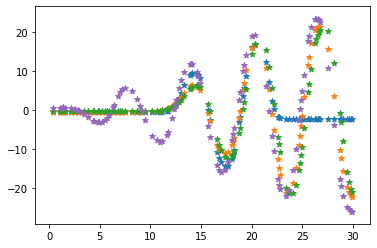

In [115]:
for i in range(2,7):
    conf.tree_depth = 2*i
    learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)
    run.fit(conf.epochs, learn)
    zz = run.recorder.tot_pred.cpu().numpy()
    plt.scatter(xx, zz, marker='*')

plt.show()

### Loss vs. No. of batch iterations:

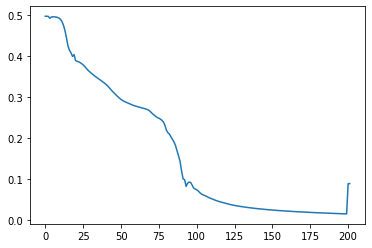

In [12]:
run.recorder.plot_loss()

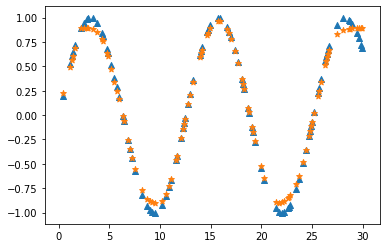

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [ ]:
conf.epochs = 100
conf.one_batch = True
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs)
run.fit(conf.epochs, learn)

In [ ]:
run.recorder.plot_loss()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()

plt.scatter(xx, yy, marker='^')
plt.scatter(xx, zz, marker='*')

plt.show()

In [33]:
mu = run.learner.model.mu
y_hat = run.learner.model.y_hat

In [34]:
mu.size()

torch.Size([99, 2048])

In [66]:
sort_mu = torch.sort(-mu, dim=1)
sumu = torch.unique(sort_mu[1][:,3])

In [76]:
sort_mu[1][:,0]

tensor([19,  4,  1,  1,  1,  1,  4,  1,  1,  4,  1,  1,  4,  1,  1,  1,  4,  1,
         1, 19,  4,  1,  4,  1,  1,  1,  1,  1, 19,  4,  1,  1,  1, 19,  1,  1,
         1, 19, 19, 19,  1,  1,  1,  1,  1, 19,  1,  1,  4,  1,  1, 19,  4,  1,
         4,  1,  1,  1,  1,  4, 19,  1,  1,  1,  4,  1,  1,  1,  1,  1,  4,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1, 19,  1], device='cuda:0')

In [35]:
arg_mu = torch.argmax(mu, dim=1).cpu().numpy()
uni_mu = np.unique(arg_mu)
arg_mu

array([4, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 1,
       4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1,
       4, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1,
       1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1])

### Distribution of most popular leafs:

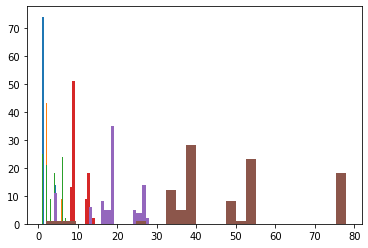

In [114]:
for i in range(6):
    plt.hist(sort_mu[1][:,i].cpu(),bins=30)



### values of most popular leafs:

In [89]:
-yh

array([ 0.13809688,  0.13809688, -0.3921559 , -0.3921559 , -0.3921559 ,
       -0.3921559 ,  0.13809688, -0.3921559 , -0.3921559 ,  0.13809688,
       -0.3921559 , -0.3921559 ,  0.13809688, -0.3921559 , -0.3921559 ,
       -0.3921559 ,  0.13809688, -0.3921559 , -0.3921559 ,  0.13809688,
        0.13809688, -0.3921559 ,  0.13809688, -0.3921559 , -0.3921559 ,
       -0.3921559 , -0.3921559 , -0.3921559 ,  0.13809688,  0.13809688,
       -0.3921559 , -0.3921559 , -0.3921559 ,  0.13809688, -0.3921559 ,
       -0.3921559 , -0.3921559 ,  0.13809688,  0.13809688,  0.13809688,
       -0.3921559 , -0.3921559 , -0.3921559 , -0.3921559 ,  0.13809688,
        0.13809688, -0.3921559 , -0.3921559 ,  0.13809688, -0.3921559 ,
       -0.3921559 ,  0.13809688,  0.13809688, -0.3921559 ,  0.13809688,
       -0.3921559 , -0.3921559 , -0.3921559 , -0.3921559 ,  0.13809688,
        0.13809688, -0.3921559 ,  0.13809688,  0.13809688,  0.13809688,
       -0.3921559 , -0.3921559 ,  0.13809688, -0.3921559 , -0.39

In [85]:
yh = y_hat[arg_mu].detach().cpu().numpy()
yh_orig = y_hat.detach().cpu().numpy()

In [86]:
yh_orig[sumu.cpu()]

array([-3.3405118 ,  0.4646285 , -1.2563902 ,  0.76028883, 13.409193  ,
       -3.4215808 ], dtype=float32)

### Value of samples by most popular leaf:

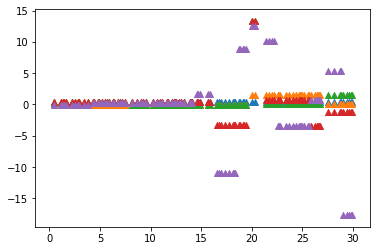

In [94]:
for i in range(5):
    sort_mu[1][:,i]
    yh = y_hat[sort_mu[1][:,i]].detach().cpu().numpy()
    plt.scatter(xx, yh, marker='^')

# plt.scatter(xx, yy, marker='*')
# plt.scatter(xx, zz, marker='o')
# plt.show()

In [96]:
uni_mu

array([1, 4])

In [97]:
uni_mu_dist = mu[:,uni_mu].cpu().numpy()
sumu_dist = mu[:,sumu].cpu().numpy()

In [106]:
np.shape(sumu_dist.T[0])

(99,)

In [105]:
np.shape(xx)

(99, 1)

### Distribution of most popular nodes over all samples:

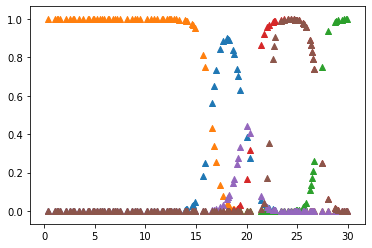

In [110]:
for i in range(6):
    plt.scatter(xx, sumu_dist.T[i], marker='^')

plt.show()

In [52]:
mu.size()

torch.Size([99, 2048])

In [ ]:
len(yh_orig)

### Distribution of arbitrary samples over nodes:

ValueError: x and y must be the same size

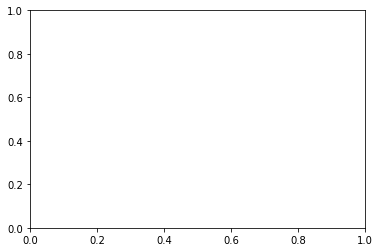

In [38]:
for i in range(10):
    j = i*33
    plt.scatter(j+100*mu[i*33,:].cpu().numpy(),np.arange(0,64), marker='*')

plt.show()

### Value of nodes of arbitrary samples vs. probability:

In [ ]:
for i in range(10):
    j = i*33
    plt.scatter(mu[i*33,:].cpu().numpy(),yh_orig, marker='*')

plt.show()

In [ ]:
plt.scatter(xx, yh, marker='^')
plt.scatter(xx, yy, marker='*')
plt.scatter(xx, zz, marker='o')
plt.show()

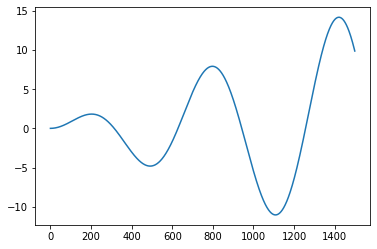

In [30]:
import numpy as np
import scipy
x = np.arange(0,15 , 0.01)
y=scipy.special.spherical_jn(0,x)*x**2
plt.plot(y)